In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
from scipy.interpolate import interp1d
import matplotlib.cm as cm
from salishsea_tools import (nc_tools, gsw_calls, geo_tools, viz_tools)
import seabird
import cmocean as cmo
from mpl_toolkits.mplot3d import Axes3D

In [2]:
bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')

mesh_mask = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/mesh_mask.nc')

mbathy = mesh_mask['mbathy'][0,...]

Z = bathy.variables['Bathymetry'][:]

y_wcvi_slice = np.arange(230,350)
x_wcvi_slice = np.arange(550,650)

zlevels = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/CDF_COMB_COMPRESSED/NEP036-N30_IN_20140915_00001440_grid_T.nc').variables['deptht']


lon = bathy['nav_lon'][...]
lat = bathy['nav_lat'][...]


NEP_aug = nc.Dataset('/home/ssahu/saurav/NEP36_T_S_Spice_aug.nc')


sal_aug = NEP_aug.variables['vosaline']
temp_aug = NEP_aug.variables['votemper']
spic_aug = NEP_aug.variables['spiciness']
rho_aug = NEP_aug.variables['density']

zlevels = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/CDF_COMB_COMPRESSED/NEP036-N30_IN_20140915_00001440_grid_T.nc').variables['deptht']


NEP_jul = nc.Dataset('/home/ssahu/saurav/NEP36_T_S_Spice_july.nc')


sal_jul  = NEP_jul.variables['vosaline']
temp_jul = NEP_jul.variables['votemper']
spic_jul = NEP_jul.variables['spiciness']
rho_jul = NEP_jul.variables['density']


NEP_iso_jul = nc.Dataset('/home/ssahu/saurav/jul_along_iso.nc')

spic_iso_jul = NEP_iso_jul.variables['spiciness']
iso_t = NEP_iso_jul.variables['isot']


In [84]:
t= 0


rho_0 = 26.4
depth_rho_0 = np.zeros_like(sal_jul[0,0,...])

SPICE_on_rho_0 = np.zeros_like(depth_rho_0)

for j in np.arange(230,350):
    for i in np.arange(550,650):
        if mbathy[j,i] > 0:
            depth_rho_0[j, i] = np.interp(rho_0, rho_aug[t,:mbathy[j, i], j, i]-1000, zlevels[:mbathy[j, i]])
            SPICE_on_rho_0[j, i] = np.interp(depth_rho_0[j, i], zlevels[:mbathy[j, i]], spic_aug[t,:mbathy[j,i], j, i])

In [82]:
np.min(SPICE_on_rho_0)

-24.3207

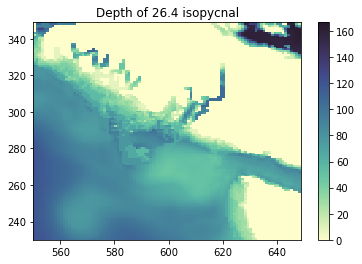

In [40]:
plt.pcolormesh(x_wcvi_slice,y_wcvi_slice,depth_rho_0[230:350,550:650], cmap=cmo.cm.deep)
plt.colorbar()
plt.title('Depth of 26.4 isopycnal')

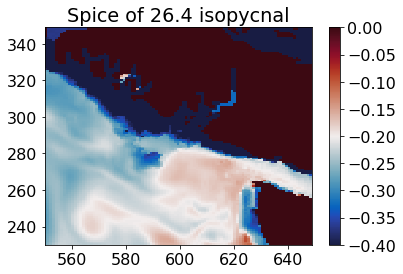

In [88]:
plt.pcolormesh(x_wcvi_slice,y_wcvi_slice,SPICE_on_rho_0[230:350,550:650], cmap=cmo.cm.balance, vmax= 0, vmin=-0.4)
plt.colorbar()
plt.title('Spice of 26.4 isopycnal')

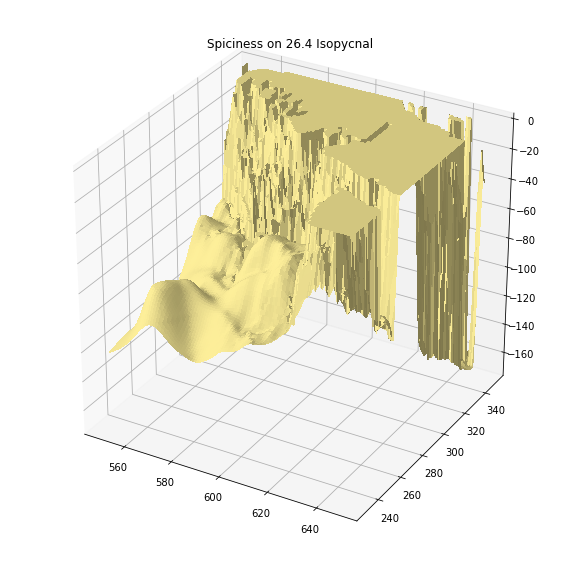

In [76]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.set_title('Spiciness on 26.4 Isopycnal')
X, Y = np.meshgrid(x_wcvi_slice[:],y_wcvi_slice[:])
# surf = ax.plot_surface(X, Y, -Z[230:350,550:650], linewidth=0, vmin = -150, antialiased=False, rstride=1, cstride=1)
surf = ax.plot_surface(X, Y, -depth_rho_0[230:350,550:650], facecolors=cmo.cm.haline_r(SPICE_on_rho_0[230:350,550:650]), vmin = -24, vmax = 0,linewidth=0, antialiased=False, rstride=1, cstride=1)




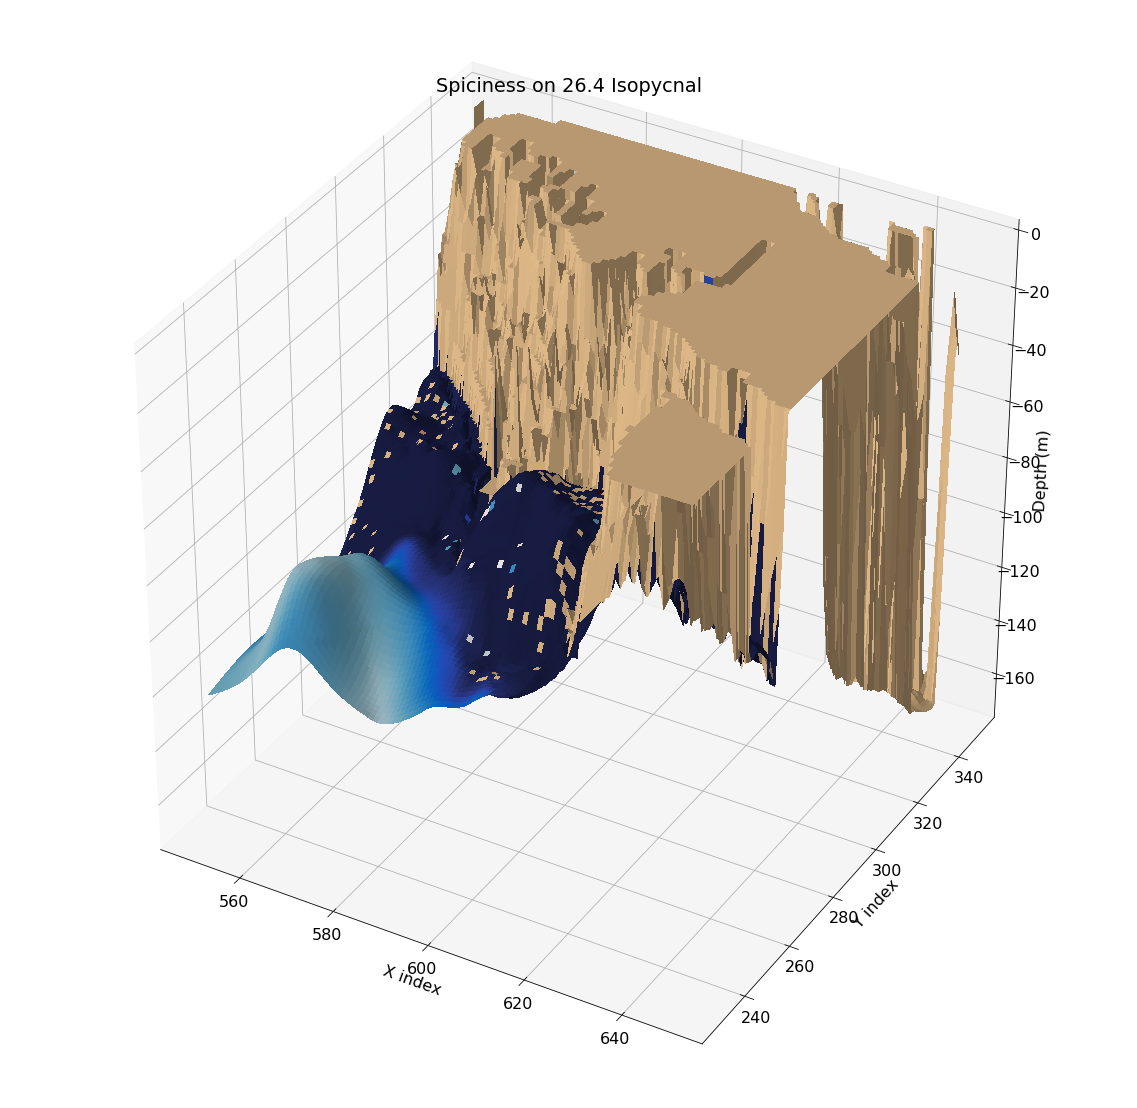

In [125]:
plt.rcParams['contour.negative_linestyle'] = 'solid' # default is to have negative contours with dashed lines
plt.rcParams.update({'font.size':16})


spic_tzyx = spic_iso_jul[t,110,...]
spic_tzyx[np.isnan(spic_tzyx)] = 0
spic_iso = np.ma.masked_equal(spic_tzyx, 0)
spic_plot = (spic_iso-np.mean(spic_iso))/np.mean(spic_iso)

cmap = plt.get_cmap(cmo.cm.balance)
# cmap = plt.get_cmap('YlOrBr')
cmap.set_bad('burlywood')

# cmap = cmap((spic_tzyx-np.mean(spic_tzyx))/np.mean(spic_tzyx))
cmap = cmap(spic_plot)


fig = plt.figure(figsize=(20, 20))
ax = fig.gca(projection='3d')
ax.set_title('Spiciness on 26.4 Isopycnal')
X, Y = np.meshgrid(x_wcvi_slice[:],y_wcvi_slice[:])
# surf = ax.plot_surface(X, Y, -Z[230:350,550:650], linewidth=0, vmin = -150, antialiased=False, rstride=1, cstride=1)
surf = ax.plot_surface(X, Y, -depth_rho_0[230:350,550:650], facecolors=cmap,linewidth=0,vmin=-0.1,vmax =1, antialiased=False, rstride=1, cstride=1)

#cb = fig.colorbar(surf, shrink=0.65)
# cset = ax.contour(X,Y,-Z[230:350,550:650],colors='k', rstride=2, cstride=2,zdir='z')
ax.set_aspect('auto')

ax.view_init(35, 300) # elevation and azimuth

ax.set_ylabel('Y index')
ax.set_xlabel('X index')
ax.set_zlabel('Depth (m)')

In [123]:
np.min(spic_plot)

-0.47868842

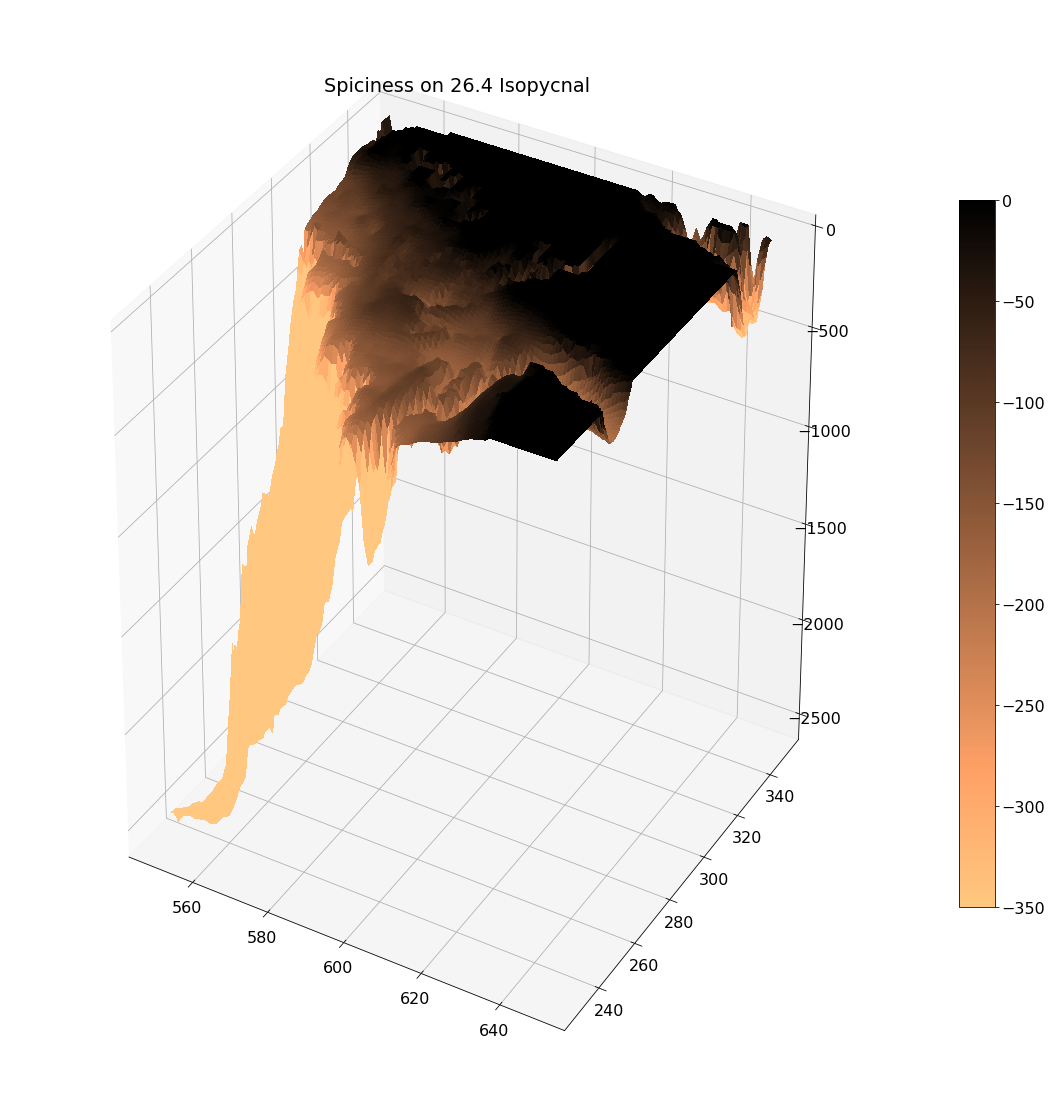

In [104]:
spic_tzyx = spic_iso_jul[25,110,...]
spic_tzyx[np.isnan(spic_tzyx)] = 0
spic_iso = np.ma.array(spic_tzyx, mask = 0)

cmap = plt.get_cmap('copper_r')
cmap.set_bad('burlywood')

# cmap = cmap((spic_tzyx-np.mean(spic_tzyx))/np.mean(spic_tzyx))

fig = plt.figure(figsize=(20, 20))
ax = fig.gca(projection='3d')
ax.set_title('Spiciness on 26.4 Isopycnal')
X, Y = np.meshgrid(x_wcvi_slice[:],y_wcvi_slice[:])
# surf = ax.plot_surface(X, Y, -Z[230:350,550:650], linewidth=0, vmin = -150, antialiased=False, rstride=1, cstride=1)
surf = ax.plot_surface(X, Y, -Z[230:350,550:650],linewidth=0, cmap=cmap, vmin= -350, vmax =0, antialiased=False, rstride=1, cstride=1)

cb = fig.colorbar(surf, shrink=0.65)
# cset = ax.contour(X,Y,-Z[230:350,550:650],colors='k', rstride=2, cstride=2,zdir='z')


In [20]:
PP = (spic_tzyx-np.mean(spic_tzyx))/np.mean(spic_tzyx)

In [22]:
np.min(PP)

-1.0

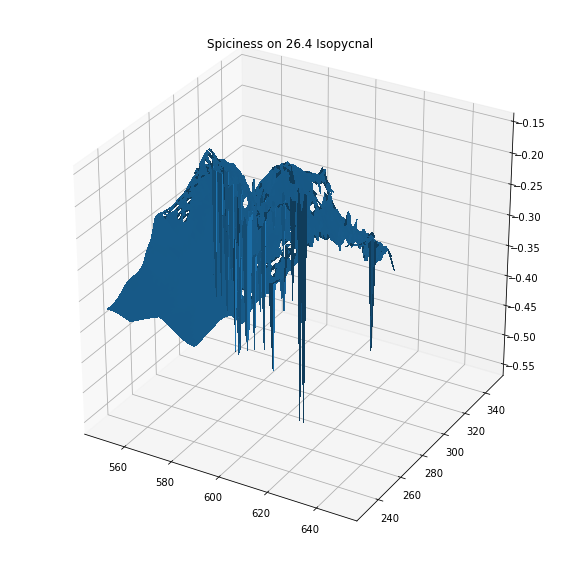

In [93]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.set_title('Spiciness on 26.4 Isopycnal')
X, Y = np.meshgrid(x_wcvi_slice[:],y_wcvi_slice[:])
# surf = ax.plot_surface(X, Y, -Z[230:350,550:650], linewidth=0, vmin = -150, antialiased=False, rstride=1, cstride=1)
surf = ax.plot_surface(X, Y, spic_iso_jul[0,110,...], linewidth=0, antialiased=False, rstride=1, cstride=1)



In [92]:
spic_iso_jul.shape

(31, 128, 120, 100)

In [72]:
np.max(Z[230:350,550:650])

2584.3240662189942

In [98]:
np.nanmean(spic_iso_jul[0,110,...])

-0.27901369

In [29]:
mbathy[230:350,550:650]

array([[42, 42, 42, ...,  0,  0,  0],
       [42, 42, 42, ...,  0,  0,  0],
       [42, 42, 42, ...,  0,  0,  0],
       ..., 
       [ 0, 22, 22, ..., 22, 20, 17],
       [ 0, 23, 23, ..., 18, 12, 16],
       [23, 24, 24, ..., 17, 15, 17]], dtype=int16)